In [2]:
import joblib
import numpy as np
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
class CSI_Struct:
    def __init__(self, tstamp, channel, chanBW, rate, nr, nc, num_tones, noise, phyerr, rssi, rssi_0, rssi_1, rssi_2, payload_len, csi_len, buf_len):
        self.tstamp = tstamp
        self.channel = channel
        self.chanBW = chanBW
        self.rate = rate
        self.nr = nr
        self.nc = nc
        self.num_tones = num_tones
        self.noise = noise
        self.phyerr = phyerr
        self.rssi = rssi
        self.rssi_0 = rssi_0
        self.rssi_1 = rssi_1
        self.rssi_2 = rssi_2
        self.payload_len = payload_len
        self.csi_len = csi_len
        self.buf_len = buf_len

In [4]:
csi_mat = joblib.load('./data/philipp_pushups_testing_56.joblib') [1]
csi_mat.shape

(311322, 3, 3, 56)

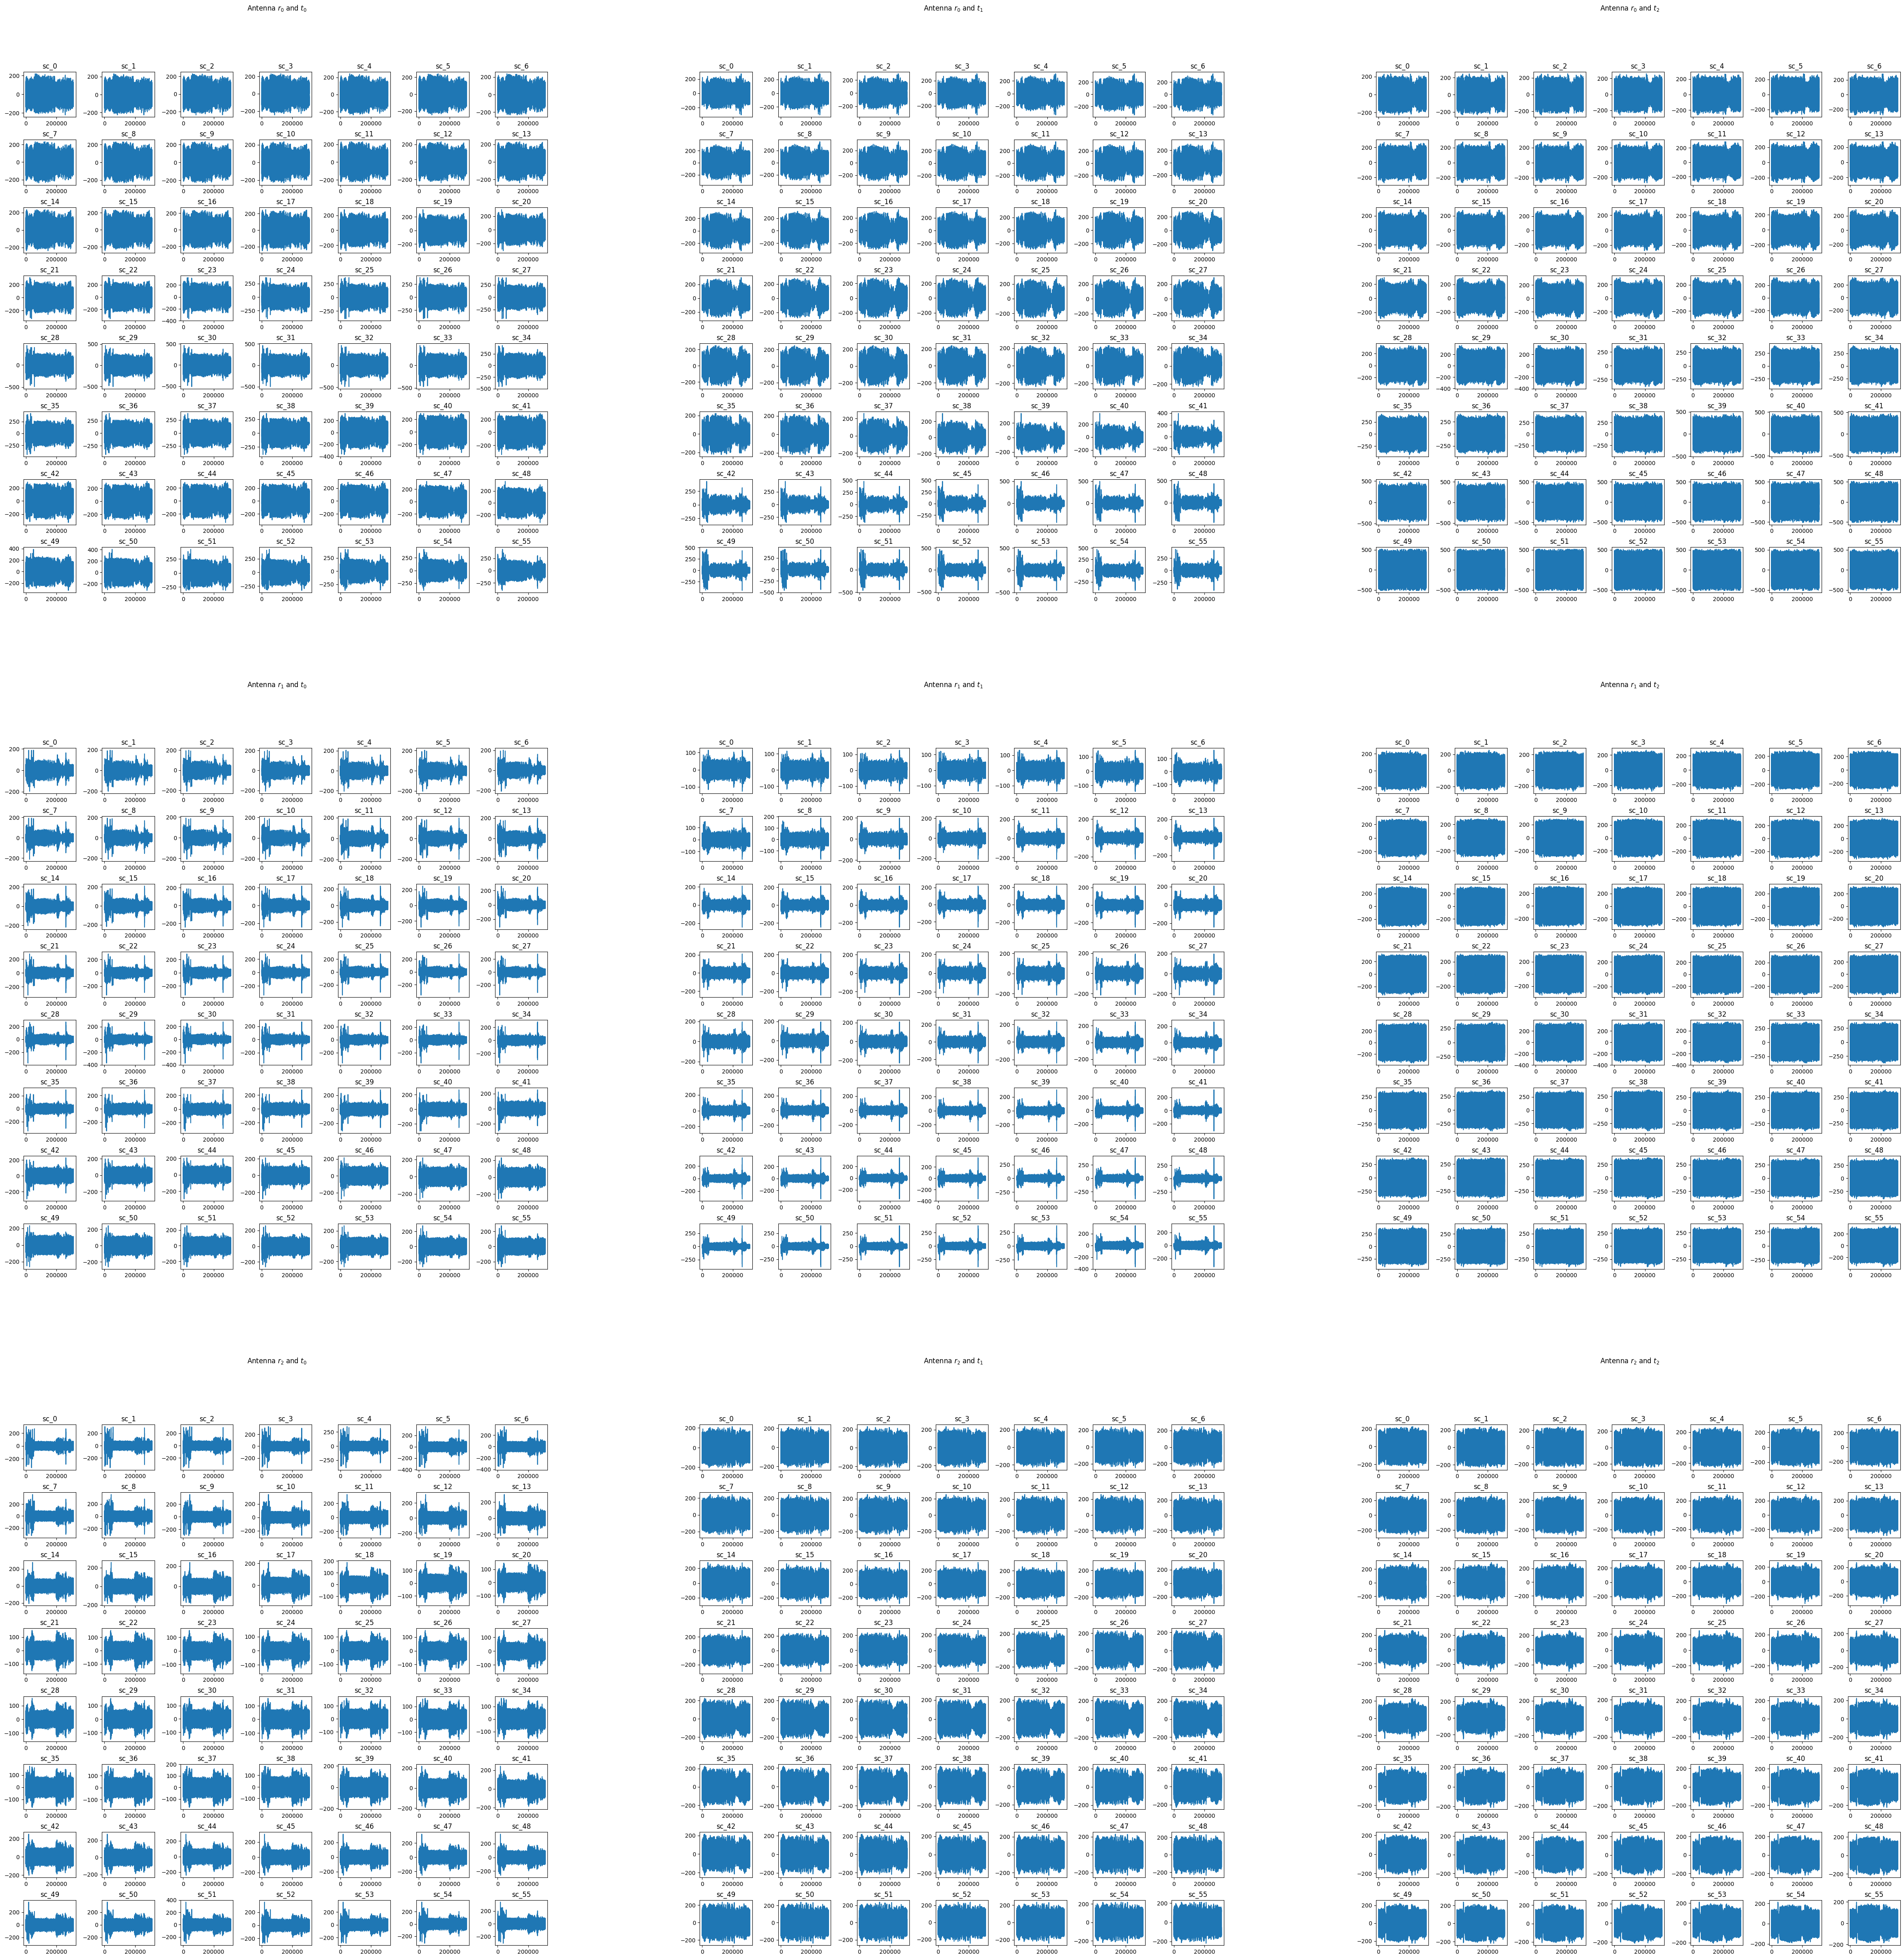

In [12]:
# create a matplotlib figure with 3x3 subplots
fig = plt.figure(figsize=(50, 50))
subfigs = fig.subfigures(3, 3)
# reduce the fig margin
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(3):
    for j in range(3):
        subfigs[i, j].suptitle(f'Antenna $r_{i}$ and $t_{j}$')
        ax = subfigs[i, j].subplots(8, 7)

        for sc in range(56):
            row, col = sc//7, sc%7
            ax[row, col].plot(csi_mat[:, i, j, sc])
            ax[row, col].set_title(f'sc_{sc}')
            # remove x labels
            ax[row, col].set_xticks([])

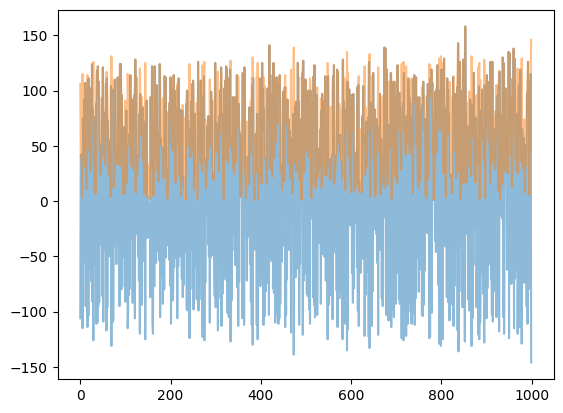

In [14]:
csi_trace = csi_mat[:, 0, 0, 0]
# take the absolute value of the CSI
csi_trace_abs = np.abs(csi_trace)
# plot the CSI amplitude
plt.plot(csi_trace[:1000], alpha=0.5)
plt.plot(csi_trace_abs[:1000], alpha=0.5)

In [ ]:
for i in range(3):
    for j in range(3):
        # ax[i, j].plot(csi_mat[:, i, j, 30])
        # create a 56 subplots for each antenna pair subplot
        ax[i, j].set_title(f'Antenna $r_{i}$ to $t_{j}$')
        plt.sca(ax[i, j])
        fig_sub, ax_sub = plt.subplots(7, 8)
        for sc in range(5):
            ax_sub.plot(csi_mat[:, i, j, sc])
            ax_sub[1, sc].title(f'Subcarrier {sc}')